In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [179]:
inspections = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

#### Initial review / EDA of restaurant inspection data

In [180]:
inspections.head()

CAMIS                   DBA           BORO BUILDING  \
0  50113925            BAD HABITS         Queens     3203   
1  50132324                   NaN  Staten Island       81   
2  50128941  Londel's Supper Club      Manhattan     2620   
3  50125033                   NaN         Queens     8609   
4  50115776             DISCOVERY      Manhattan      230   

                         STREET  ZIPCODE       PHONE CUISINE DESCRIPTION  \
0                      BROADWAY  11106.0  3477385989                 NaN   
1                  WINANT PLACE  10309.0     9960317                 NaN   
2  FREDERICK DOUGLASS BOULEVARD      NaN  2122340601                 NaN   
3                 ROOSEVELT AVE  11372.0  3477715709                 NaN   
4                    PARK AVE S  10003.0  7043286907                 NaN   

  INSPECTION DATE ACTION  ... INSPECTION TYPE   Latitude  Longitude  \
0      01/01/1900    NaN  ...             NaN  40.761538 -73.924450   
1      01/01/1900    NaN  ...             NaN  40.536829 -74.240246   
2      01/01/1900    NaN  ...             NaN   0.000000   0.000000   
3      01/01/1900    NaN  ...             NaN  40.748045 -73.880020   
4      01/01/1900    NaN  ...             NaN  40.737875 -73.988749   

   Community Board Council District Census Tract        BIN           BBL  \
0            401.0             22.0       6100.0  4008406.0  4.006140e+09   
1            503.0             51.0      22600.0  5095694.0  5.074000e+09   
2              NaN              NaN          NaN        NaN  1.000000e+00   
3            403.0             21.0      27900.0  4036259.0  4.014740e+09   
4            105.0              2.0       5200.0  1016152.0  1.008470e+09   

    NTA  Location Point1  
0  QN70              NaN  
1  SI11              NaN  
2   NaN              NaN  
3  QN28              NaN  
4  MN13              NaN  

[5 rows x 27 columns]

There are 202,467 rows in the dataset, relating to the number of inspections performed. However, each row is not a unique restaurant. Restaurants are supposed to be inspected each year, and will be reinspected if they have violations. Therefore, we want to get a list of unique restaurants for our analysis. This will be based on the "CAMIS" column, as that is a unique identifier for each restauruants (some restaurants might have the same name)

In [181]:
# total number of inspcections in the dataset
len(inspections)

202467

In [182]:
# total number of restaurants in the dataset
inspections['CAMIS'].value_counts()

40398688    65
50045647    56
50085082    53
50053703    52
50044250    48
            ..
50130922     1
50132775     1
50120697     1
50116821     1
50124778     1
Name: CAMIS, Length: 28336, dtype: int64

In [183]:
inspections.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
Location Point1          float64
dtype: object

In [184]:
inspections.describe()

CAMIS        ZIPCODE          SCORE       Latitude  \
count  2.024670e+05  199669.000000  191591.000000  202167.000000   
mean   4.729017e+07   10703.806064      22.001461      40.169377   
std    4.137438e+06     593.567374      17.015877       4.735021   
min    3.007544e+07    8512.000000       0.000000       0.000000   
25%    4.160144e+07   10023.000000      11.000000      40.682895   
50%    5.005626e+07   11101.000000      18.000000      40.730690   
75%    5.009891e+07   11230.000000      29.000000      40.761559   
max    5.013531e+07   14228.000000     157.000000      40.912822   

           Longitude  Community Board  Council District   Census Tract  \
count  202167.000000    199067.000000     199067.000000  199067.000000   
mean      -72.928098       253.097394         20.689145   29914.731000   
std         8.595933       129.527818         15.813652   31366.630995   
min       -74.249101       101.000000          1.000000     100.000000   
25%       -73.988840       106.000000          4.000000    8000.000000   
50%       -73.956300       302.000000         20.000000   17401.000000   
75%       -73.896173       401.000000         34.000000   42200.000000   
max         0.000000       595.000000         51.000000  162100.000000   

                BIN           BBL  Location Point1  
count  1.980430e+05  2.018370e+05              0.0  
mean   2.559049e+06  2.446582e+09              NaN  
std    1.339920e+06  1.332327e+09              NaN  
min    1.000000e+06  1.000000e+00              NaN  
25%    1.050078e+06  1.010740e+09              NaN  
50%    3.018442e+06  3.006920e+09              NaN  
75%    4.003534e+06  4.002480e+09              NaN  
max    5.799501e+06  5.270001e+09              NaN

#### Initial Cleaning of dataset

Initial cleaning of dataset consists of converting date columns to datetime, removing irreleviant features, and filtering dataset for rows with missing data. 

In [185]:
# convert inspection data, grade data, and record data to datetime
inspections['INSPECTION DATE'] = pd.to_datetime(inspections['INSPECTION DATE'])
inspections['GRADE DATE'] = pd.to_datetime(inspections['GRADE DATE'])
inspections['RECORD DATE'] = pd.to_datetime(inspections['RECORD DATE'])

In [186]:
# record date is only when the database was last udpated, is not related to specific restaurant inspections
inspections['RECORD DATE'].unique()

array(['2023-04-24T00:00:00.000000000'], dtype='datetime64[ns]')

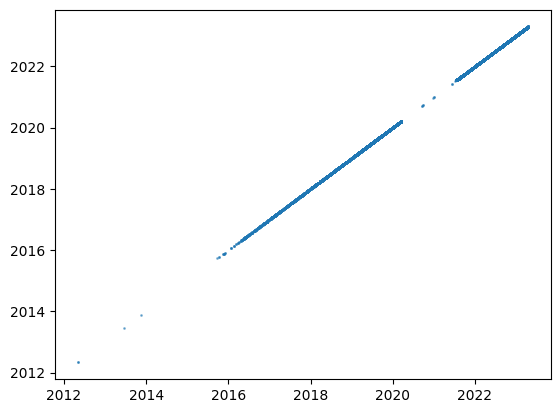

In [187]:
# plot of inspection date by grade date
plt.scatter(inspections['INSPECTION DATE'], inspections['GRADE DATE'], s=1, alpha=0.5)
plt.show()

In [188]:
# there is no difference detween the inspection date and the grade date, so we only need one column
temp = inspections.copy()
temp['DATE DELTA']  = temp['GRADE DATE'] - temp['INSPECTION DATE']
temp['DATE DELTA'].unique()

array(['NaT',     0], dtype='timedelta64[ns]')

In [189]:
# drop irrelevant columns
inspections = inspections.drop(['DBA','BUILDING', 'STREET', 'PHONE', 'GRADE DATE', 'INSPECTION TYPE', 'RECORD DATE','Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL', 'Location Point1'], axis=1)
inspections.head()

CAMIS           BORO  ZIPCODE CUISINE DESCRIPTION INSPECTION DATE  \
0  50113925         Queens  11106.0                 NaN      1900-01-01   
1  50132324  Staten Island  10309.0                 NaN      1900-01-01   
2  50128941      Manhattan      NaN                 NaN      1900-01-01   
3  50125033         Queens  11372.0                 NaN      1900-01-01   
4  50115776      Manhattan  10003.0                 NaN      1900-01-01   

  ACTION VIOLATION CODE VIOLATION DESCRIPTION   CRITICAL FLAG  SCORE GRADE  \
0    NaN            NaN                   NaN  Not Applicable    NaN   NaN   
1    NaN            NaN                   NaN  Not Applicable    NaN   NaN   
2    NaN            NaN                   NaN  Not Applicable    NaN   NaN   
3    NaN            NaN                   NaN  Not Applicable    NaN   NaN   
4    NaN            NaN                   NaN  Not Applicable    NaN   NaN   

    Latitude  Longitude   NTA  
0  40.761538 -73.924450  QN70  
1  40.536829 -74.240246  SI11  
2   0.000000   0.000000   NaN  
3  40.748045 -73.880020  QN28  
4  40.737875 -73.988749  MN13

In [190]:
# inspect data with inspection dates in 1900
temp = inspections.copy()
temp = inspections[inspections['INSPECTION DATE'] == '1900-01-01']
temp.describe()

CAMIS       ZIPCODE  SCORE     Latitude    Longitude
count  4.292000e+03   4207.000000    0.0  4228.000000  4228.000000
mean   5.012187e+07  10663.045876    NaN    40.181255   -72.948528
std    9.760313e+03    603.456185    NaN     4.698196     8.529053
min    5.006988e+07   8512.000000    NaN     0.000000   -74.249101
25%    5.011494e+07  10019.000000    NaN    40.693592   -73.989628
50%    5.012321e+07  10465.000000    NaN    40.733804   -73.960354
75%    5.013036e+07  11226.000000    NaN    40.760313   -73.906839
max    5.013531e+07  14228.000000    NaN    40.907189     0.000000

In [191]:
# all data with an inspection date of 1900-01-01 has not been inspected or graded yet, so removing from the dataset
temp.GRADE.unique()

array([nan], dtype=object)

In [192]:
inspections = inspections[inspections['INSPECTION DATE']>'1901']
inspections.describe()

CAMIS        ZIPCODE          SCORE       Latitude  \
count  1.981750e+05  195462.000000  191591.000000  197939.000000   
mean   4.722884e+07   10704.683360      22.001461      40.169124   
std    4.160734e+06     593.323508      17.015877       4.735816   
min    3.007544e+07   10000.000000       0.000000       0.000000   
25%    4.158542e+07   10023.000000      11.000000      40.682575   
50%    5.005344e+07   11101.000000      18.000000      40.730629   
75%    5.009606e+07   11230.000000      29.000000      40.761575   
max    5.013478e+07   12345.000000     157.000000      40.912822   

           Longitude  
count  197939.000000  
mean      -72.927662  
std         8.597376  
min       -74.248708  
25%       -73.988820  
50%       -73.956244  
75%       -73.896098  
max         0.000000

In [193]:
# filter out data that does not have lat / long
inspections = inspections[inspections['Latitude']>35]
inspections = inspections[inspections['Longitude']<-65]
inspections.describe()

CAMIS        ZIPCODE          SCORE       Latitude  \
count  1.952260e+05  195226.000000  188730.000000  195226.000000   
mean   4.726063e+07   10704.492066      22.047682      40.727342   
std    4.148649e+06     593.248581      17.026021       0.068843   
min    3.007544e+07   10000.000000       0.000000      40.499563   
25%    4.159660e+07   10023.000000      11.000000      40.684939   
50%    5.005438e+07   11101.000000      18.000000      40.732186   
75%    5.009640e+07   11230.000000      29.000000      40.761974   
max    5.013478e+07   12345.000000     157.000000      40.912822   

           Longitude  
count  195226.000000  
mean      -73.941117  
std         0.075410  
min       -74.248708  
25%       -73.989080  
50%       -73.957175  
75%       -73.899759  
max       -73.700928

In [194]:
# filter out rows with no inspection grade
inspections = inspections[inspections['GRADE'].notna()]

In [195]:
# sort by most recent inspection, then take only the most recent inspection for each unique restaurant so we only have one row per restaurant
inspections.sort_values(by='INSPECTION DATE', ascending=False, inplace=True)
inspections.drop_duplicates(subset=['CAMIS'], keep='first', inplace=True)

In [196]:
inspections.head()

CAMIS       BORO  ZIPCODE CUISINE DESCRIPTION INSPECTION DATE  \
135909  50084224  Manhattan  10011.0            Japanese      2023-04-22   
54357   50110667     Queens  11377.0            Filipino      2023-04-22   
197012  41241757  Manhattan  10025.0                Thai      2023-04-22   
98176   50111258     Queens  11385.0            American      2023-04-22   
19142   50108237     Queens  11101.0             Tex-Mex      2023-04-21   

                                                 ACTION VIOLATION CODE  \
135909  Violations were cited in the following area(s).            04L   
54357   Violations were cited in the following area(s).            08A   
197012  Violations were cited in the following area(s).            02G   
98176   Violations were cited in the following area(s).            06C   
19142   Violations were cited in the following area(s).            02B   

                                    VIOLATION DESCRIPTION CRITICAL FLAG  \
135909  Evidence of mice or live mice in establishment...      Critical   
54357   Establishment is not free of harborage or cond...  Not Critical   
197012  Cold TCS food item held above 41 °F; smoked or...      Critical   
98176   Food, supplies, or equipment not protected fro...      Critical   
19142      Hot TCS food item not held at or above 140 °F.      Critical   

        SCORE GRADE   Latitude  Longitude   NTA  
135909   10.0     A  40.740033 -73.991790  MN13  
54357    26.0     N  40.746354 -73.896141  QN63  
197012    7.0     A  40.801203 -73.965155  MN09  
98176     8.0     A  40.705122 -73.906106  QN20  
19142    13.0     A  40.753427 -73.937818  QN68

#### EDA on cleaned data

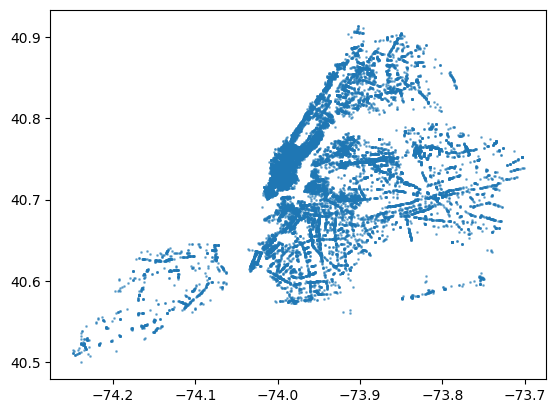

In [197]:
# plot restaurant lat / long on scatter plot to visualize locations
plt.scatter(inspections.Longitude, inspections.Latitude, s=1, alpha=0.5)
plt.show()

##### Inspection Grades

<AxesSubplot:>

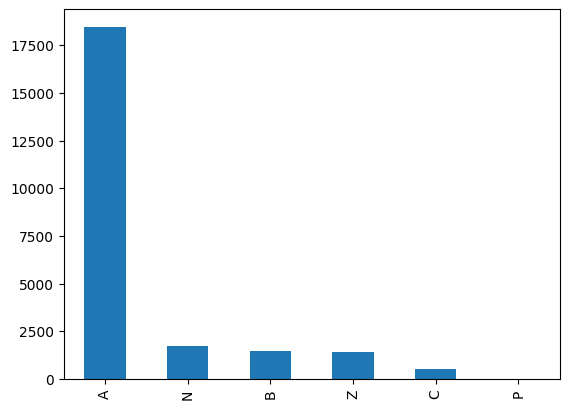

In [198]:
# "A" grade: 0 to 13 points for sanitary violations
# "B" grade: 14 to 27 points for sanitary violations
# "C" grade: 28 or more points for sanitary violations
# "P" grade: pending issued on re-opening following an initial inspection that resulted in a closure
# "Z" grade: grade pending
# "N" grade: not yet graded

inspections.GRADE.value_counts().plot(kind='bar')

In [202]:
# plot range of scores for most recent restaurant inspections
fig = px.histogram(inspections, x="SCORE",marginal="box")
fig.show()

In [203]:
# plot range of scores for most recent restaurant inspections
fig = px.histogram(inspections, x="INSPECTION DATE",marginal="box")
fig.show()

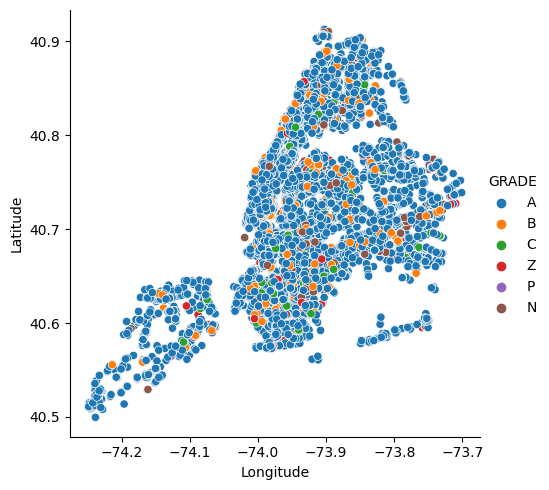

In [204]:
# plot restaurant lat / long on scatter plot to visualize locations
score_buckets = ['A', 'B', 'C', 'Z', 'P', 'N']
# plt.scatter(inspections.Longitude, inspections.Latitude, s=1, c=inspections.SCORE, alpha=0.5)

sns.relplot(data=inspections, x='Longitude', y='Latitude', hue='GRADE', hue_order=score_buckets)
plt.show()

In [205]:
fig = px.scatter(inspections, x='Longitude', y='Latitude', color='SCORE', hover_data=['ZIPCODE', 'INSPECTION DATE', 'CUISINE DESCRIPTION'], 
                 width=900, height=800)
fig.show()

##### Inspection Types

In [207]:
inspections['VIOLATION DESCRIPTION'].value_counts()

Non-food contact surface or equipment made of unacceptable material, not kept clean, or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                                                                                                                3373
Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                                                        2020
Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.                                                                                                                                                                                         2002
Esta

In [214]:
inspections['CRITICAL FLAG'].unique()

array(['Critical', 'Not Critical', 'Not Applicable'], dtype=object)

In [208]:
inspections.ACTION.unique()

array(['Violations were cited in the following area(s).',
       'Establishment re-opened by DOHMH.',
       'No violations were recorded at the time of this inspection.',
       'Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.'],
      dtype=object)

<AxesSubplot:>

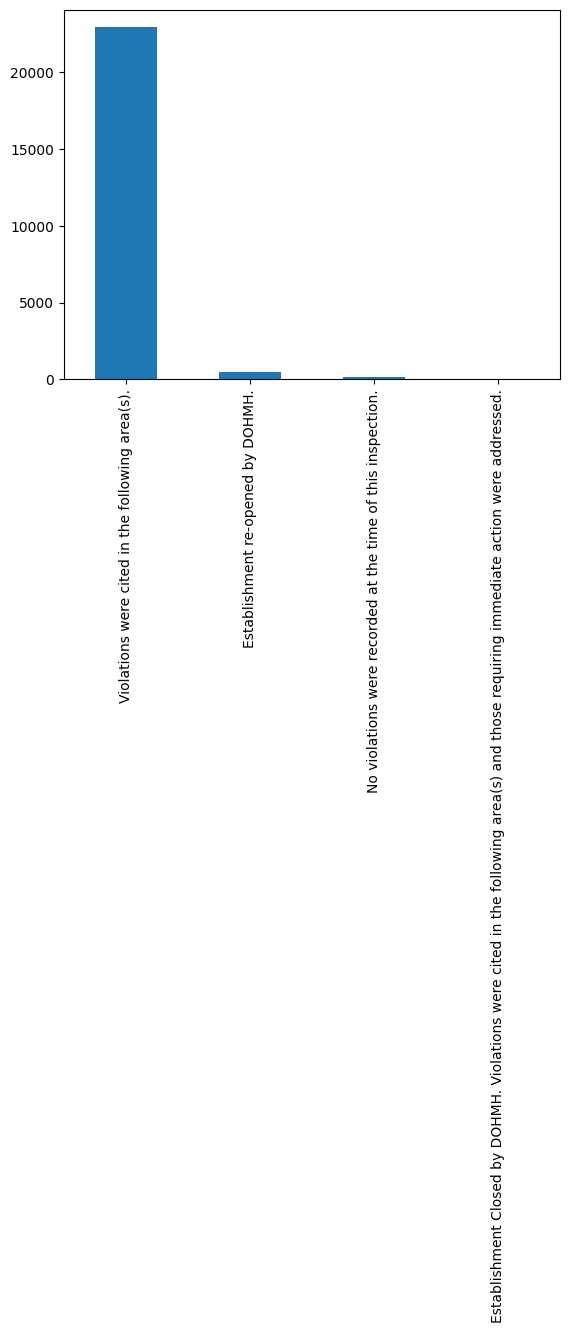

In [209]:
inspections.ACTION.value_counts().plot(kind='bar')

#### One-hot encoding

In [210]:
inspections['CUISINE DESCRIPTION'].unique()

array(['Japanese', 'Filipino', 'Thai', 'American', 'Tex-Mex',
       'Sandwiches/Salads/Mixed Buffet', 'Coffee/Tea', 'Korean', 'Other',
       'Italian', 'Salads', 'Bottled Beverages', 'Donuts',
       'Soups/Salads/Sandwiches', 'Juice, Smoothies, Fruit Salads',
       'Latin American', 'Scandinavian', 'Chinese', 'Sandwiches',
       'Creole', 'Pizza', 'Southeast Asian', 'Hamburgers', 'Mexican',
       'Indian', 'Frozen Desserts', 'French', 'Vegetarian', 'Chicken',
       'Hotdogs/Pretzels', 'Mediterranean', 'Spanish', 'Caribbean',
       'Continental', 'Jewish/Kosher', 'Bakery Products/Desserts',
       'Barbecue', 'Asian/Asian Fusion', 'German', 'Soul Food', 'Tapas',
       'Vegan', 'Turkish', 'Seafood', 'Californian', 'African', 'Russian',
       'Bagels/Pretzels', 'Greek', 'Irish', 'Middle Eastern',
       'Steakhouse', 'Chinese/Cuban', 'Eastern European', 'Peruvian',
       'Chinese/Japanese', 'Not Listed/Not Applicable', 'Bangladeshi',
       'Hotdogs', 'Australian', 'Pakistani',

In [211]:
inspections['CUISINE DESCRIPTION'].value_counts()

American        4530
Chinese         2045
Coffee/Tea      1684
Pizza           1473
Italian          923
                ... 
Southwestern       2
Iranian            2
Armenian           2
Chilean            2
Basque             1
Name: CUISINE DESCRIPTION, Length: 87, dtype: int64

In [216]:
encoded = pd.get_dummies(inspections, columns = ['CUISINE DESCRIPTION', 'CRITICAL FLAG', 'ACTION'])
encoded

CAMIS       BORO  ZIPCODE INSPECTION DATE VIOLATION CODE  \
135909  50084224  Manhattan  10011.0      2023-04-22            04L   
54357   50110667     Queens  11377.0      2023-04-22            08A   
197012  41241757  Manhattan  10025.0      2023-04-22            02G   
98176   50111258     Queens  11385.0      2023-04-22            06C   
19142   50108237     Queens  11101.0      2023-04-21            02B   
...          ...        ...      ...             ...            ...   
61253   41470133  Manhattan  10027.0      2017-09-15            08A   
95251   50043445  Manhattan  10032.0      2017-03-10            02G   
40132   41365127      Bronx  10460.0      2017-02-24            09B   
193636  50057889  Manhattan  10019.0      2016-12-23            06C   
90440   41611669     Queens  11420.0      2013-11-15            10F   

                                    VIOLATION DESCRIPTION  SCORE GRADE  \
135909  Evidence of mice or live mice in establishment...   10.0     A   
54357   Establishment is not free of harborage or cond...   26.0     N   
197012  Cold TCS food item held above 41 °F; smoked or...    7.0     A   
98176   Food, supplies, or equipment not protected fro...    8.0     A   
19142      Hot TCS food item not held at or above 140 °F.   13.0     A   
...                                                   ...    ...   ...   
61253   Facility not vermin proof. Harborage or condit...   24.0     B   
95251   Cold food item held above 41º F (smoked fish a...    8.0     A   
40132                        Thawing procedures improper.   13.0     A   
193636  Food not protected from potential source of co...    5.0     N   
90440   Non-food contact surface improperly constructe...    3.0     A   

         Latitude  Longitude  ... CUISINE DESCRIPTION_Turkish  \
135909  40.740033 -73.991790  ...                           0   
54357   40.746354 -73.896141  ...                           0   
197012  40.801203 -73.965155  ...                           0   
98176   40.705122 -73.906106  ...                           0   
19142   40.753427 -73.937818  ...                           0   
...           ...        ...  ...                         ...   
61253   40.817266 -73.959746  ...                           0   
95251   40.842565 -73.942097  ...                           0   
40132   40.843059 -73.886393  ...                           0   
193636  40.766983 -73.983502  ...                           0   
90440   40.677665 -73.828758  ...                           0   

        CUISINE DESCRIPTION_Vegan  CUISINE DESCRIPTION_Vegetarian  \
135909                          0                               0   
54357                           0                               0   
197012                          0                               0   
98176                           0                               0   
19142                           0                               0   
...                           ...                             ...   
61253                           0                               0   
95251                           0                               0   
40132                           0                               0   
193636                          0                               0   
90440                           0                               0   

        CRITICAL FLAG_Critical  CRITICAL FLAG_Not Applicable  \
135909                       1                             0   
54357                        0                             0   
197012                       1                             0   
98176                        1                             0   
19142                        1                             0   
...                        ...                           ...   
61253                        0                             0   
95251                        1                             0   
40132                        0                             0   
193636             

In [217]:
encoded.groupby(by='ZIPCODE').sum()

CAMIS   SCORE      Latitude     Longitude  \
ZIPCODE                                                    
10000.0     50132187    13.0     40.782289    -73.965194   
10001.0  21401531132  5102.0  18214.831171 -33074.693065   
10002.0  21597082007  5252.0  18241.725147 -33147.412048   
10003.0  26170231565  6786.0  22565.008255 -40989.902361   
10004.0   5276720699  1187.0   4599.533555  -8363.321647   
...              ...     ...           ...           ...   
11692.0    583048903   129.0    487.090064   -885.564084   
11693.0   1589967577   321.0   1339.405001  -2435.911125   
11694.0   1876023617   347.0   1623.218818  -2953.499059   
11697.0    122896288    32.0    121.686913   -221.744644   
12345.0     50048969    12.0     40.817722    -73.941941   

         CUISINE DESCRIPTION_Afghan  CUISINE DESCRIPTION_African  \
ZIPCODE                                                            
10000.0                           0                            0   
10001.0                           0                            1   
10002.0                           0                            0   
10003.0                           0                            0   
10004.0                           0                            0   
...                             ...                          ...   
11692.0                           0                            0   
11693.0                           0                            1   
11694.0                           0                            0   
11697.0                           0                            0   
12345.0                           0                            0   

         CUISINE DESCRIPTION_American  CUISINE DESCRIPTION_Armenian  \
ZIPCODE                                                               
10000.0                             0                             0   
10001.0                           130                             0   
10002.0                            92                             1   
10003.0                           126                             0   
10004.0                            36                             0   
...                               ...                           ...   
11692.0                             1                             0   
11693.0                            10                             0   
11694.0                            13                             0   
11697.0                             3                             0   
12345.0                             1                             0   

         CUISINE DESCRIPTION_Asian/Asian Fusion  \
ZIPCODE                                           
10000.0                                       0   
10001.0                                       9   
10002.0                                      15   
10003.0                                      17   
10004.0                                       3   
...                                         ...   
11692.0                                       1   
11693.0                                       0   
11694.0                                       0   
11697.0                                       0   
12345.0                                       0   

         CUISINE DESCRIPTION_Australian  ...  CUISINE DESCRIPTION_Turkish  \
ZIPCODE                                  ...                                
10000.0                               0  ...                            0   
10001.0                               2  ...                            0   
10002.0                               2  ...                            2   
10003.0                               1  ...                            0   
10004.0                               0  ...                            0   
...                                 ...  ...                          ...   
11692.0                               0  ...                            0   
11693.0                               0  ...                        

In [170]:
inspections.head()

CAMIS                              DBA       BORO  ZIPCODE  \
135909  50084224                       HALL , ODO  Manhattan  10011.0   
185398  50110667  KABAYAN BISTRO LOUNGE & BANQUET     Queens  11377.0   
98176   50111258                 ICE CREAM WINDOW     Queens  11385.0   
197012  41241757                      THAI MARKET  Manhattan  10025.0   
96156   50107393          CARDAMOM INDIAN CUISINE     Queens  11104.0   

       CUISINE DESCRIPTION INSPECTION DATE  \
135909            Japanese      2023-04-22   
185398            Filipino      2023-04-22   
98176             American      2023-04-22   
197012                Thai      2023-04-22   
96156               Indian      2023-04-21   

                                                 ACTION VIOLATION CODE  \
135909  Violations were cited in the following area(s).            04L   
185398  Violations were cited in the following area(s).            04L   
98176   Violations were cited in the following area(s).            06C   
197012  Violations were cited in the following area(s).            02G   
96156   Violations were cited in the following area(s).            10F   

                                    VIOLATION DESCRIPTION CRITICAL FLAG  \
135909  Evidence of mice or live mice in establishment...      Critical   
185398  Evidence of mice or live mice in establishment...      Critical   
98176   Food, supplies, or equipment not protected fro...      Critical   
197012  Cold TCS food item held above 41 °F; smoked or...      Critical   
96156   Non-food contact surface or equipment made of ...  Not Critical   

        SCORE GRADE                                INSPECTION TYPE   Latitude  \
135909   10.0     A          Cycle Inspection / Initial Inspection  40.740033   
185398   26.0     N          Cycle Inspection / Initial Inspection  40.746354   
98176     8.0     A  Pre-permit (Operational) / Initial Inspection  40.705122   
197012    7.0     A          Cycle Inspection / Initial Inspection  40.801203   
96156    13.0     A       Pre-permit (Operational) / Re-inspection  40.744488   

        Longitude   NTA  
135909 -73.991790  MN13  
185398 -73.896141  QN63  
98176  -73.906106  QN20  
197012 -73.965155  MN09  
96156  -73.921265  QN31

<AxesSubplot:>

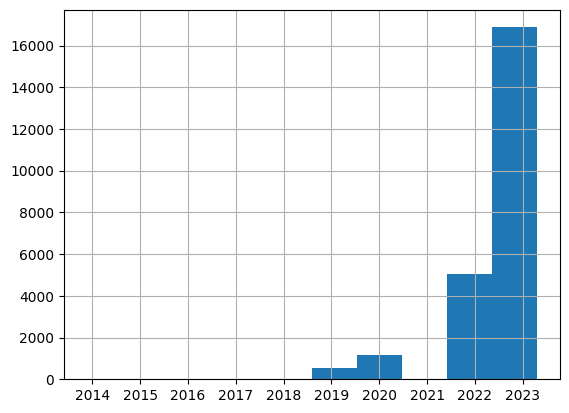

In [172]:
inspections['INSPECTION DATE'].hist()


In [175]:
inspections[inspections['INSPECTION DATE']>'2022']

CAMIS                                    DBA       BORO  ZIPCODE  \
135909  50084224                             HALL , ODO  Manhattan  10011.0   
185398  50110667        KABAYAN BISTRO LOUNGE & BANQUET     Queens  11377.0   
98176   50111258                       ICE CREAM WINDOW     Queens  11385.0   
197012  41241757                            THAI MARKET  Manhattan  10025.0   
96156   50107393                CARDAMOM INDIAN CUISINE     Queens  11104.0   
...          ...                                    ...        ...      ...   
105575  50105431  GOLDEN KRUST CARIBBEAN BAKERY & GRILL  Manhattan  10027.0   
142734  50115344                      PAPA JOHN'S PIZZA   Brooklyn  11212.0   
87929   40741630                           SUSIE'S PIES      Bronx  10458.0   
194465  40366487                         BRENNAN & CARR   Brooklyn  11229.0   
19855   40578092                COSTELLO'S CLADDAGH INN   Brooklyn  11229.0   

       CUISINE DESCRIPTION INSPECTION DATE  \
135909            Japanese      2023-04-22   
185398            Filipino      2023-04-22   
98176             American      2023-04-22   
197012                Thai      2023-04-22   
96156               Indian      2023-04-21   
...                    ...             ...   
105575           Caribbean      2022-01-03   
142734               Pizza      2022-01-03   
87929                Pizza      2022-01-03   
194465            American      2022-01-03   
19855                Irish      2022-01-03   

                                                 ACTION VIOLATION CODE  \
135909  Violations were cited in the following area(s).            04L   
185398  Violations were cited in the following area(s).            04L   
98176   Violations were cited in the following area(s).            06C   
197012  Violations were cited in the following area(s).            02G   
96156   Violations were cited in the following area(s).            10F   
...                                                 ...            ...   
105575  Violations were cited in the following area(s).            10D   
142734  Violations were cited in the following area(s).            10F   
87929   Violations were cited in the following area(s).            10F   
194465  Violations were cited in the following area(s).            10F   
19855   Violations were cited in the following area(s).            06D   

                                    VIOLATION DESCRIPTION CRITICAL FLAG  \
135909  Evidence of mice or live mice in establishment...      Critical   
185398  Evidence of mice or live mice in establishment...      Critical   
98176   Food, supplies, or equipment not protected fro...      Critical   
197012  Cold TCS food item held above 41 °F; smoked or...      Critical   
96156   Non-food contact surface or equipment made of ...  Not Critical   
...                                                   ...           ...   
105575  Mechanical or natural ventilation system not p...  Not Critical   
142734  Non-food contact surface improperly constructe...  Not Critical   
87929   Non-food contact surface improperly constructe...  Not Critical   
194465  Non-food contact surface improperly constructe...  Not Critical   
19855   Food contact surface not properly washed, rins...      Critical   

        SCORE GRADE                                INSPECTION TYPE   Latitude  \
135909   10.0     A          Cycle Inspection / Initial Inspection  40.740033   
185398   26.0     N          Cycle Inspection / Initial Inspection  40.746354   
98176     8.0     A  Pre-permit (Operational) / Initial Inspection  40.705122   
197012    7.0     A          Cycle Inspection / Initial Inspection  40.801203   
96156    13.0     A       Pre-permit (Operational) / Re-inspection  40.744488   
...       ...   ...                                            ...        ...   
105575    4.0     A       Pre-permit (Operational) / Re-inspection  40.807376   
142734    2.0     A  Pre-permit (Operational) / Initial Inspection  40.